In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from mdp_env import build_dataset
from SVRG_solver import solve

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [3]:
dim = 400
f_dim = 21
length = 5000
gamma = 0.95
args = {'dim' : dim, 'f_dim' : f_dim, 'num_episodes' : length,
        'solve' : True, 'gamma' : gamma, 'PHI' : 'random'}
problem_set = build_dataset(args)
print(problem_set.keys())

dict_keys(['P', 'stat_dist', 'R', 'dataset', 'PHI', 'theta_pi_true', 'A_hat', 'C_hat', 'theta_est'])


In [4]:
eig_min = torch.linalg.eigvals(1/2*(problem_set['A_hat']+ problem_set['A_hat'].T) ).real.min().item()
eig_min, 32/eig_min

(0.0007844448555260897, 40793.17975581487)

In [21]:
%%time
from SVRG_solver import solve

with torch.no_grad():
    experiment_results = {}
    problem_set = build_dataset(args)
    problem_set['theta_init'] =  torch.ones((f_dim, 1)).to(device)
    args['num_outer'] = 20
    for i in range(1,2):
        result = solve(problem_set, args)

Number of updates in epoch: 36541
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
CPU times: total: 2min 12s
Wall time: 2min 13s


In [22]:
result.keys()

dict_keys(['distances', 'thetas', 'milestones'])

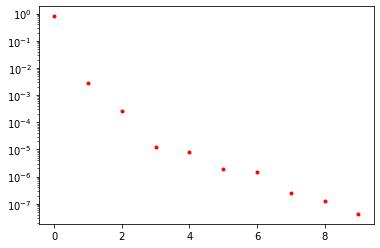

In [23]:
plt.plot(result['distances'], 'r.')
plt.yscale('log')
plt.show()

In [37]:
from policy_iter_solve import solve as pi_solve

In [47]:
%%time
problem_set['milestones'] = result['milestones']
args['learning_rate'] = 'const'
result2 = pi_solve(problem_set, args)

Reached milestone 54646
Reached milestone 93534
Reached milestone 152251
Reached milestone 193011
Reached milestone 241432
Reached milestone 280354
Reached milestone 333709
Reached milestone 375011
Reached milestone 423511
CPU times: total: 4min 52s
Wall time: 4min 58s


In [48]:
%%time
problem_set['milestones'] = result['milestones']
args['learning_rate'] = 'root'
result3 = pi_solve(problem_set, args)

Reached milestone 54646
Reached milestone 93534
Reached milestone 152251
Reached milestone 193011
Reached milestone 241432
Reached milestone 280354
Reached milestone 333709
Reached milestone 375011
Reached milestone 423511
CPU times: total: 4min 46s
Wall time: 4min 52s


In [34]:
problem_set['milestones']

[0, 54646, 93534, 152251, 193011, 241432, 280354, 333709, 375011, 423511]

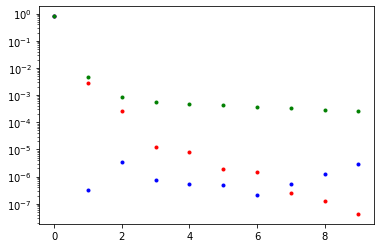

In [49]:
plt.plot(result['distances'], 'r.')
plt.plot(result2['distances'], 'b.')
plt.plot(result3['distances'], 'g.')
plt.yscale('log')
plt.show()

In [50]:
%%time
problem_set['milestones'] = result['milestones']
args['learning_rate'] = 'decr'
result4 = pi_solve(problem_set, args)

Reached milestone 54646
Reached milestone 93534
Reached milestone 152251
Reached milestone 193011
Reached milestone 241432
Reached milestone 280354
Reached milestone 333709
Reached milestone 375011
Reached milestone 423511
CPU times: total: 4min 55s
Wall time: 4min 59s


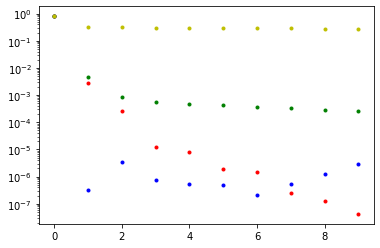

In [51]:
plt.plot(result['distances'], 'r.')
plt.plot(result2['distances'], 'b.')
plt.plot(result3['distances'], 'g.')
plt.plot(result4['distances'], 'y.')
plt.yscale('log')
plt.show()

In [52]:
%%time
problem_set['milestones'] = result['milestones']
args['learning_rate'] = 1/16
result5 = pi_solve(problem_set, args)

Reached milestone 54646
Reached milestone 93534
Reached milestone 152251
Reached milestone 193011
Reached milestone 241432
Reached milestone 280354
Reached milestone 333709
Reached milestone 375011
Reached milestone 423511
CPU times: total: 4min 53s
Wall time: 4min 58s


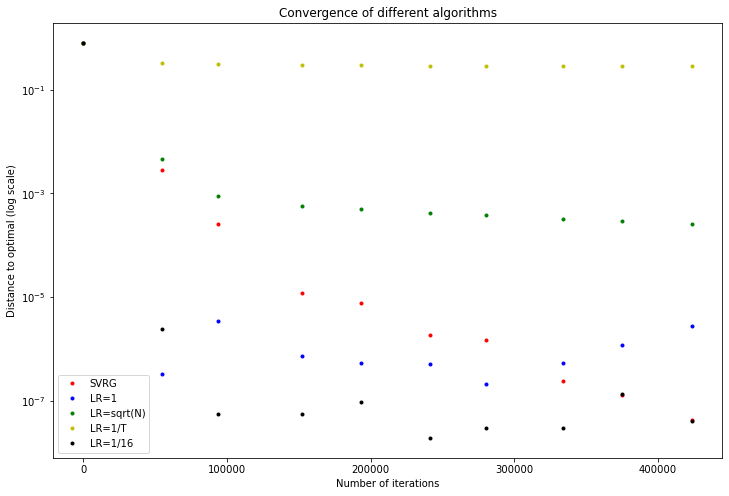

In [63]:
plt.figure(figsize=(12,8))
plt.title('Convergence of different algorithms')
plt.plot(result['milestones'], result['distances'], 'r.', label='SVRG')
plt.plot(result['milestones'], result2['distances'], 'b.', label='LR=1')
plt.plot(result['milestones'], result3['distances'], 'g.', label='LR=sqrt(N)')
plt.plot(result['milestones'], result4['distances'], 'y.', label='LR=1/T')
plt.plot(result['milestones'], result5['distances'], 'k.', label='LR=1/16')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Distance to optimal (log scale)')
plt.savefig('Experiment_results.png')

In [9]:
dim = 400
f_dim = 21
length = 5000
gamma = 0.95
args = {'dim' : dim, 'f_dim' : f_dim, 'num_episodes' : length,
        'solve' : True, 'gamma' : gamma, 'PHI' : 'random', 'dtype' : torch.float64}
problem_set = build_dataset(args)
print(problem_set.keys())

dict_keys(['P', 'stat_dist', 'R', 'dataset', 'PHI', 'theta_pi_true', 'A_hat', 'C_hat', 'theta_est'])


In [10]:
problem_set['P'].dtype

torch.float64

In [11]:
%%time
from SVRG_solver import solve

with torch.no_grad():
    experiment_results = {}
    problem_set = build_dataset(args)
    problem_set['theta_init'] =  torch.ones((f_dim, 1), dtype=args['dtype']).to(device)
    args['num_outer'] = 20
    for i in range(1,2):
        result = solve(problem_set, args)

Number of updates in epoch: 31944
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
CPU times: total: 5min 23s
Wall time: 5min 24s


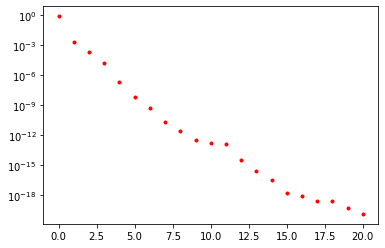

In [12]:
plt.plot(result['distances'], 'r.')
plt.yscale('log')
plt.show()

In [15]:
%%time

from policy_iter_solve import solve as pi_solve
problem_set['milestones'] = result['milestones']
args['learning_rate'] = 'const'
result2 = pi_solve(problem_set, args)

args['learning_rate'] = 'root'
result3 = pi_solve(problem_set, args)

args['learning_rate'] = 'decr'
result4 = pi_solve(problem_set, args)

args['learning_rate'] = 1/16
result5 = pi_solve(problem_set, args)

Reached milestone 33441
Reached milestone 44071
Reached milestone 80557
Reached milestone 111477
Reached milestone 141127
Reached milestone 167955
Reached milestone 197725
Reached milestone 217716
Reached milestone 239714
Reached milestone 251690
Reached milestone 256990
Reached milestone 292239
Reached milestone 318992
Reached milestone 339563
Reached milestone 367240
Reached milestone 377578
Reached milestone 391747
Reached milestone 397425
Reached milestone 416500
Reached milestone 432427
Reached milestone 33441
Reached milestone 44071
Reached milestone 80557
Reached milestone 111477
Reached milestone 141127
Reached milestone 167955
Reached milestone 197725
Reached milestone 217716
Reached milestone 239714
Reached milestone 251690
Reached milestone 256990
Reached milestone 292239
Reached milestone 318992
Reached milestone 339563
Reached milestone 367240
Reached milestone 377578
Reached milestone 391747
Reached milestone 397425
Reached milestone 416500
Reached milestone 432427
Reache

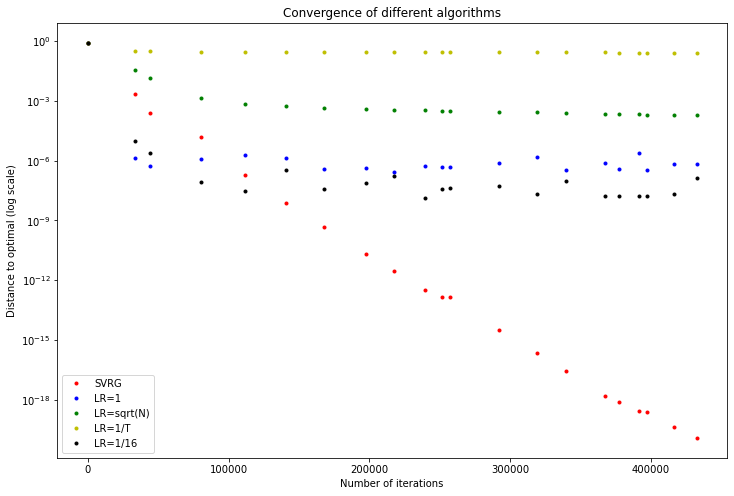

In [17]:
plt.figure(figsize=(12,8))
plt.title('Convergence of different algorithms')
plt.plot(result['milestones'], result['distances'], 'r.', label='SVRG')
plt.plot(result['milestones'], result2['distances'], 'b.', label='LR=1')
plt.plot(result['milestones'], result3['distances'], 'g.', label='LR=sqrt(N)')
plt.plot(result['milestones'], result4['distances'], 'y.', label='LR=1/T')
plt.plot(result['milestones'], result5['distances'], 'k.', label='LR=1/16')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Distance to optimal (log scale)')
plt.savefig('Experiment_results_fixed.png')

In [23]:
dim = 50
f_dim = 50
length = 5000
gamma = 0.95
args = {'dim' : dim, 'f_dim' : f_dim, 'num_episodes' : length,
        'solve' : True, 'gamma' : gamma, 'PHI' : 'tabular', 'dtype' : torch.float64}
problem_set = build_dataset(args)
print(problem_set.keys())

dict_keys(['P', 'stat_dist', 'R', 'dataset', 'PHI', 'theta_pi_true', 'A_hat', 'C_hat', 'theta_est'])


In [24]:
eig_min = torch.linalg.eigvals(1/2*(problem_set['A_hat']+ problem_set['A_hat'].T) ).real.min().item()
eig_min, 32/eig_min

(0.0009980818291532925, 32061.4994335151)

In [26]:
%%time
from SVRG_solver import solve

with torch.no_grad():
    experiment_results = {}
    problem_set = build_dataset(args)
    problem_set['theta_init'] =  torch.ones((f_dim, 1), dtype=args['dtype']).to(device)
    args['num_outer'] = 20
    for i in range(1,2):
        result = solve(problem_set, args)

Number of updates in epoch: 32070
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
CPU times: total: 5min 42s
Wall time: 5min 44s


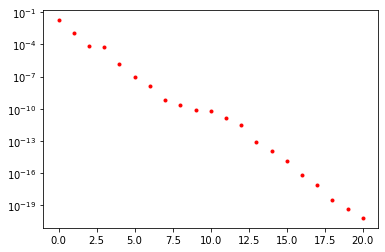

In [27]:
plt.plot(result['distances'], 'r.')
plt.yscale('log')
plt.show()

In [28]:
%%time

from policy_iter_solve import solve as pi_solve
problem_set['milestones'] = result['milestones']
args['learning_rate'] = 'const'
result2 = pi_solve(problem_set, args)

args['learning_rate'] = 'root'
result3 = pi_solve(problem_set, args)

args['learning_rate'] = 'decr'
result4 = pi_solve(problem_set, args)

args['learning_rate'] = 1/16
result5 = pi_solve(problem_set, args)

Reached milestone 26461
Reached milestone 54641
Reached milestone 60965
Reached milestone 96257
Reached milestone 124018
Reached milestone 143776
Reached milestone 173064
Reached milestone 185645
Reached milestone 199632
Reached milestone 205828
Reached milestone 223512
Reached milestone 239896
Reached milestone 274926
Reached milestone 296021
Reached milestone 318371
Reached milestone 346504
Reached milestone 369505
Reached milestone 398848
Reached milestone 419259
Reached milestone 440264
Reached milestone 26461
Reached milestone 54641
Reached milestone 60965
Reached milestone 96257
Reached milestone 124018
Reached milestone 143776
Reached milestone 173064
Reached milestone 185645
Reached milestone 199632
Reached milestone 205828
Reached milestone 223512
Reached milestone 239896
Reached milestone 274926
Reached milestone 296021
Reached milestone 318371
Reached milestone 346504
Reached milestone 369505
Reached milestone 398848
Reached milestone 419259
Reached milestone 440264
Reached 

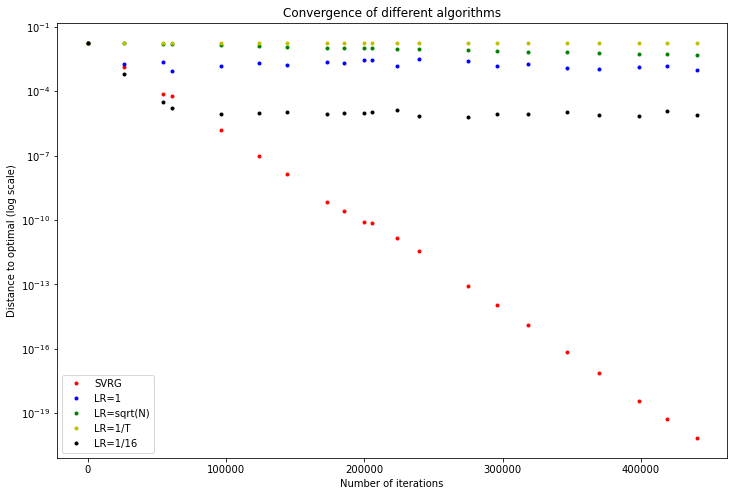

In [29]:
plt.figure(figsize=(12,8))
plt.title('Convergence of different algorithms')
plt.plot(result['milestones'], result['distances'], 'r.', label='SVRG')
plt.plot(result['milestones'], result2['distances'], 'b.', label='LR=1')
plt.plot(result['milestones'], result3['distances'], 'g.', label='LR=sqrt(N)')
plt.plot(result['milestones'], result4['distances'], 'y.', label='LR=1/T')
plt.plot(result['milestones'], result5['distances'], 'k.', label='LR=1/16')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Distance to optimal (log scale)')
plt.savefig('Experiment_results_tabular.png')